In [2]:
##importing the necessary libraries
import pandas as pd
import numpy as np

In [32]:
##Import the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [49]:
new_test_df = test_df[['Id', 'LotArea','TotalBsmtSF' , 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   TotalBsmtSF   1458 non-null   float64
 3   BsmtFullBath  1457 non-null   float64
 4   BsmtHalfBath  1457 non-null   float64
 5   FullBath      1459 non-null   int64  
 6   HalfBath      1459 non-null   int64  
 7   BedroomAbvGr  1459 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.3 KB


In [50]:
new_test_df.dropna(inplace=True)
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1457 non-null   int64  
 1   LotArea       1457 non-null   int64  
 2   TotalBsmtSF   1457 non-null   float64
 3   BsmtFullBath  1457 non-null   float64
 4   BsmtHalfBath  1457 non-null   float64
 5   FullBath      1457 non-null   int64  
 6   HalfBath      1457 non-null   int64  
 7   BedroomAbvGr  1457 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 102.4 KB


C:\Users\Ayush\AppData\Local\Temp\ipykernel_20328\2541804468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_df.dropna(inplace=True)


### Creating a new dataset

In [51]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
##Creating a new dataset based on the existing dataset
new_train_df = train_df[['Id', 'LotArea','TotalBsmtSF' ,'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]
new_train_df.head()

,Id,LotArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,8450,856,1,0,2,1,3,208500
1,2,9600,1262,0,1,2,0,3,181500
2,3,11250,920,1,0,2,1,3,223500
3,4,9550,756,1,0,1,0,3,140000
4,5,14260,1145,1,0,2,1,4,250000


In [54]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   BsmtFullBath  1460 non-null   int64
 4   BsmtHalfBath  1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   HalfBath      1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


### Visualizing the dataset

In [55]:
##importing the necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
##Checking the correlation of features with the target variable
new_corr = new_train_df.corr()

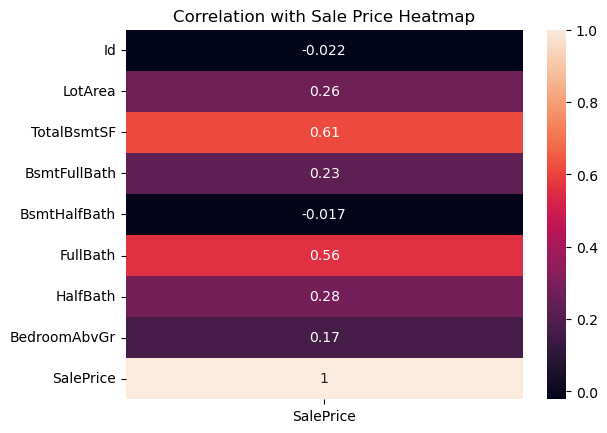

In [57]:
##Creating a heatmap
plt.figure()
sns.heatmap(new_corr[['SalePrice']], annot=True)
plt.title("Correlation with Sale Price Heatmap")
plt.show()

### Model Training(Linear Regression)

In [58]:
##importing the necessary regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We can remove the 'Id' and 'BsmtHalfBath' features because they are low in correlation to sale price

In [60]:
##Feature Selection
X = new_train_df[['LotArea','TotalBsmtSF' ,'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = new_train_df[['SalePrice']]

In [61]:
##Applying train test split on train.csv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [62]:
##Applying Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [63]:
##Displaying the regression coefficients
print(lr_model.coef_)

[[ 6.27121302e-01  7.58092059e+01  1.64492593e+04  5.64372321e+04
   4.04597571e+04 -5.01198212e+03]]


In [64]:
##Displaying the value of intercept
print(lr_model.intercept_)

[-2721.04253433]


### Evaluating the model(Linear Regression)

In [65]:
##Prediction
y_pred = lr_model.predict(X_test)
y_pred

array([[124238.79097408],
       [270621.35868634],
       [125726.91182161],
       [174365.52465507],
       [247478.24094563],
       [113848.30435007],
       [149456.46624995],
       [201823.94009631],
       [114127.37332966],
       [151326.4917267 ],
       [164335.04892799],
       [126810.81823938],
       [122753.83891828],
       [216498.49155879],
       [210681.41779846],
       [142152.96759686],
       [204426.95345499],
       [124649.37248069],
       [125593.04509757],
       [228405.75956529],
       [205765.34127352],
       [199442.79433175],
       [213387.62389891],
       [134778.84918997],
       [225704.46112811],
       [195973.93674012],
       [202282.56381017],
       [121193.22678218],
       [212573.92494595],
       [205276.22703981],
       [ 81552.61128454],
       [234347.24307856],
       [284004.81569057],
       [121177.44245711],
       [243071.84058935],
       [147018.27643885],
       [191682.05373126],
       [199918.0424398 ],
       [2525

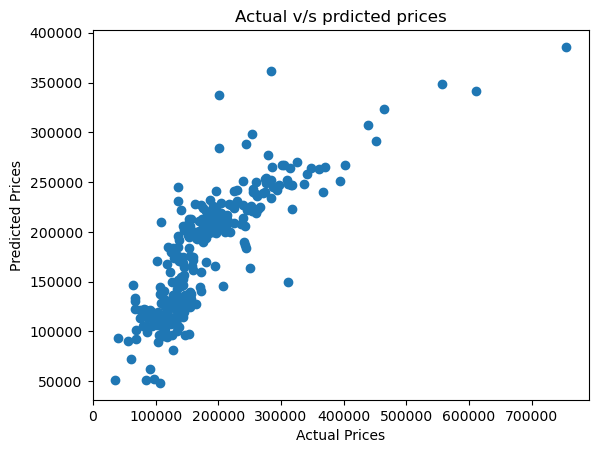

In [66]:
##Plotting the y_pred vs y_test
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual v/s prdicted prices")
plt.show()

<Axes: xlabel='SalePrice'>

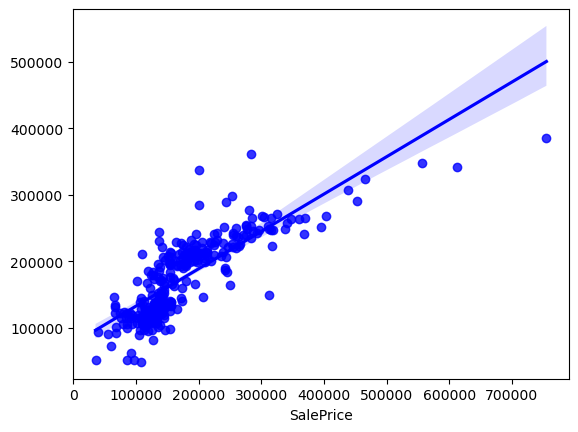

In [67]:
sns.regplot(x=y_test, y=y_pred, color = 'blue')

In [68]:
##Calculating the r2-score for the model
from sklearn.metrics import r2_score
R2_value = r2_score(y_test, y_pred)
print(R2_value)

0.6514058093174327


In [69]:
lr_model.score(X_train, y_train)

0.5927803708920479

0.4749 depicts that the accuracy of our regression model is 47.49% in reality i.e. our model explains 47.49 % of variability in our data.

### Taking the test dataset

In [35]:
X_test = new_test_df[['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]

In [36]:
##Training the model
lr_model.fit(X, y)

LinearRegression()

In [37]:
y_pred=lr_model.predict(X_test)

In [38]:
y_pred

array([[112606.119798  ],
       [145550.48551853],
       [224695.03092123],
       ...,
       [146582.41859758],
       [120117.45460539],
       [219383.04414268]])